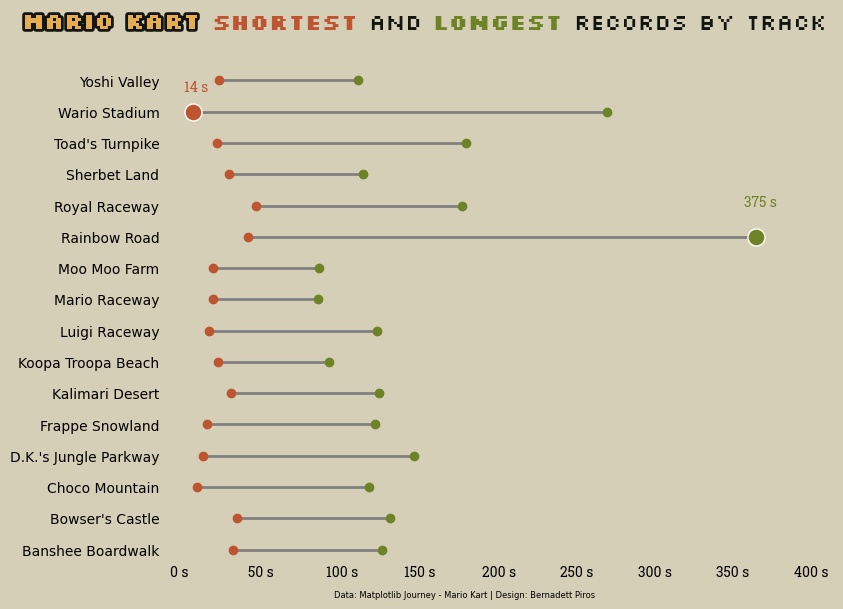

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pyfonts import load_font
from highlight_text import fig_text, ax_text
import matplotlib.patheffects as path_effects
from pypalettes import get_hex

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-25/records.csv"
df_mario = pd.read_csv(url)

font = load_font(font_url="https://github.com/google/fonts/blob/main/ofl/silkscreen/Silkscreen-Regular.ttf?raw=true")
font_bold = load_font(font_url="https://github.com/google/fonts/blob/main/ofl/silkscreen/Silkscreen-Bold.ttf?raw=true")
robo = load_font(font_url="https://github.com/google/fonts/blob/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf?raw=true")

colors = get_hex('FridaKahlo')

df = df_mario.groupby(['track']).agg({'time': ['min', 'max']}).reset_index()
df.columns = ['track', 'min', 'max']

fig, ax = plt.subplots(figsize=(8,6),facecolor= colors[2])
plt.subplots_adjust(bottom=0.02)

for i in range(len(df)):
    ax.plot([df['min'][i], df['max'][i]], [df['track'][i], df['track'][i]], color='gray', linewidth=2, zorder=1)

ax.scatter(df['min'], df['track'], color=colors[4], zorder=2)
ax.scatter(df['max'], df['track'], color=colors[1], zorder=2)

ax.scatter([df['min'].min()], [df.loc[df['min'].idxmin(), 'track']], 
    c=colors[4], edgecolor='white', s=150)

ax.scatter([df['max'].max()], [df.loc[df['max'].idxmax(), 'track']], 
    c=colors[1], edgecolor='white', s=150)

fig_text(s=f"{df['max'].max().astype(int)} s", x=0.85, y=0.65, color=colors[1], font=robo, fig=fig)
   
fig_text(s=f"{df['min'].min().astype(int)} s", x=0.15, y=0.841, color=colors[4], font=robo, fig=fig)
ax.tick_params(axis='y', which='both', length=0)

ax.set_xticks([])
ax.set_xticklabels([])

for max_time in range(0, 450, 50):
   ax_text(
      x=max_time, y=-0.5, s=f'{max_time} s',
      va='top', ha='left',
      fontsize=10, font=robo,
      color='black')

ax.yaxis.set_tick_params(labelsize=10)

def define_path_effect(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]

my_path_effect = define_path_effect(linewidth=4, foreground=colors[0] )

fig_text(
   s='<Mario Kart> <shortest> and <longest> records by track',
   x=0.45, y=0.95, fontsize=16,
   ha='center', color=colors[0],
   font=font, fig=fig,
   highlight_textprops=[{'font': font_bold, 'color': colors[3], "path_effects": my_path_effect},
                       {'font': font_bold, 'color': colors[4]},
                       {'font': font_bold, 'color': colors[1]}])

ax.grid(visible=False, which="major", axis='both')

ax.spines[['top','right','bottom', 'left']].set_visible(False)

ax.set_facecolor(colors[2])

fig.text(0.5, -0.02, "Data: Matplotlib Journey - Mario Kart | Design: Bernadett Piros",
         size=6, ha="center")

plt.show()

#plt.savefig("dumbell_mario_kart", dpi=300, bbox_inches='tight', pad_inches=0.2)